# Analyse descriptives des données "Openfoodfacts"

In [1]:
# importation des librairies nécessaires

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import scipy.stats as stats
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = 'openfoodfacts_clean_med.csv'

In [3]:
df = pd.read_csv(filepath)
df.head(3)

,code,url,creator,product_name,quantity,brands,categories,countries,ingredients_text,serving_size,...,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,created_date,created_years,last_modified_date,last_modified_years
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,jeunes pousses,NaN,endives,NaN,en:france,NaN,NaN,...,14.0,3.3,1.5,6.0,0.6,0.24,2021-06-16,2021,2021-06-16,2021
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,Vitória crackers,NaN,NaN,NaN,France,NaN,NaN,...,70.1,15.0,1.5,7.8,1.4,0.56,2018-06-15,2018,2019-06-25,2019
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,Filetes de pollo empanado,NaN,NaN,NaN,en:es,NaN,NaN,...,14.0,3.3,1.5,6.0,0.6,0.24,2019-11-19,2019,2019-11-19,2019


In [4]:
df.shape

(1271353, 38)

In [5]:
print('Nombre de produits :', len(df['product_name'].unique()))

Nombre de produits : 808442


In [6]:
print('Nombre de marques :', len(df['brands'].unique()))

Nombre de marques : 117809


In [7]:
print("Nombre de pays :", len(df["countries"].unique()))

Nombre de pays : 7628


In [8]:
df['created_years'].unique()

array([2021, 2018, 2019, 2020, 2017, 2016, 2015], dtype=int64)

In [9]:
df['last_modified_years'].unique()

array([2021, 2019, 2020], dtype=int64)

# Analyses univariées

## Description de la distribution des variables

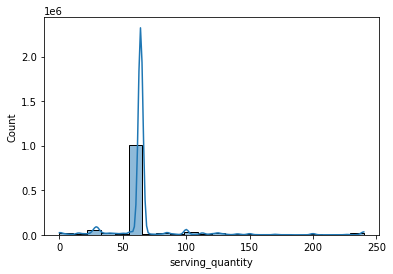

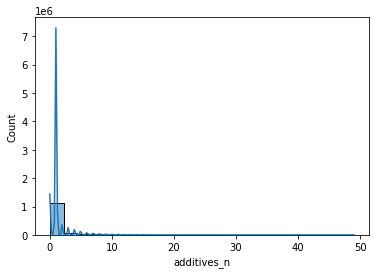

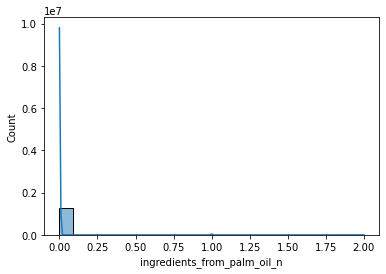

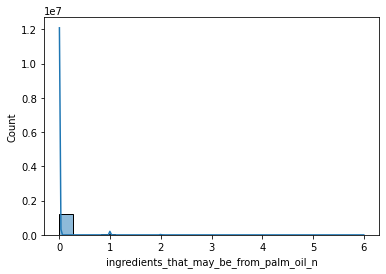

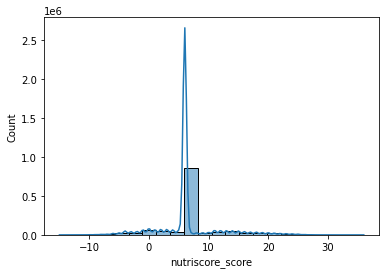

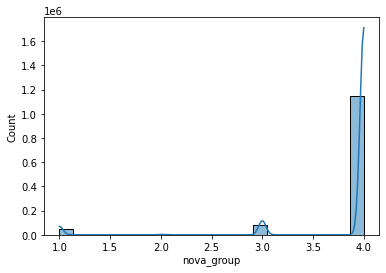

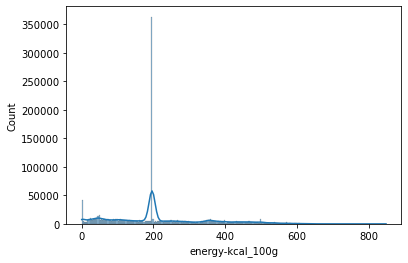

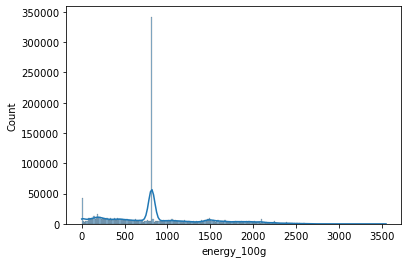

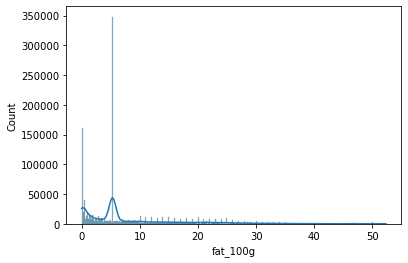

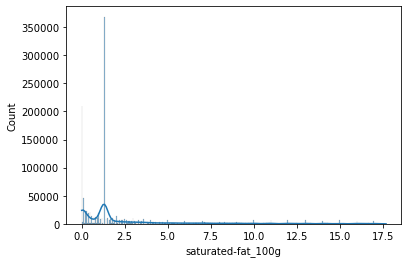

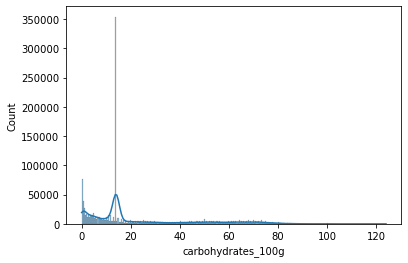

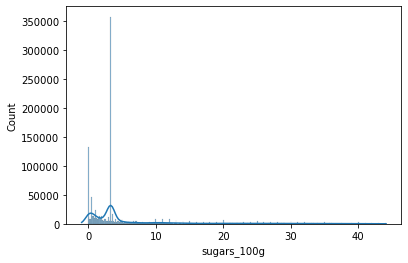

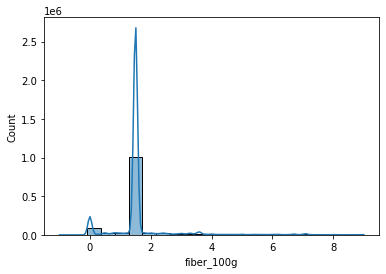

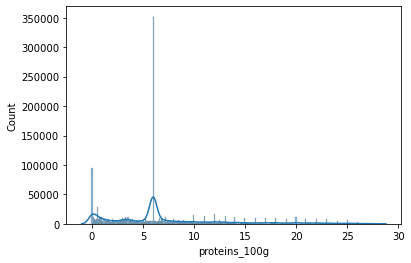

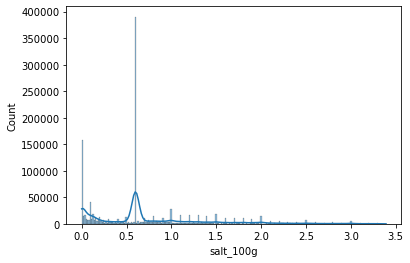

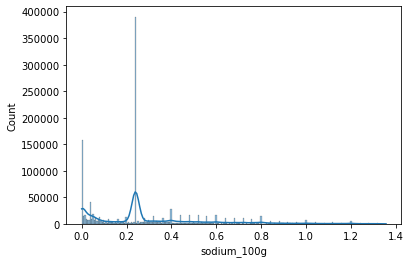

In [10]:
for var in df.columns:
    if df[var].dtypes == 'float64':
        sns.histplot(x=var, data=df, kde=True)
        plt.show()

In [8]:
pg.normality(df, method='normaltest', alpha=0.05)

,W,pval,normal
created_t,3430.407995,0.000000e+00,False
last_modified_t,3719.463363,0.000000e+00,False
serving_quantity,1278.154640,2.832998e-278,False
additives_n,2163.287608,0.000000e+00,False
ingredients_from_palm_oil_n,39671.890680,0.000000e+00,False
ingredients_that_may_be_from_palm_oil_n,39671.890680,0.000000e+00,False
nutriscore_score,1197.924450,7.481880e-261,False
nova_group,10821.789993,0.000000e+00,False
energy-kcal_100g,10551.185617,0.000000e+00,False
energy_100g,11691.509778,0.000000e+00,False


In [9]:
pg.homoscedasticity(df, method='levene', alpha=0.05)

,W,pval,equal_var
levene,0.000685,1.0,True


## Analyses descriptives des variables

### Analyses graphiques des variables

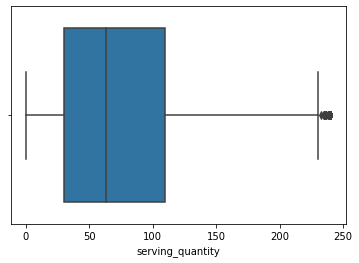

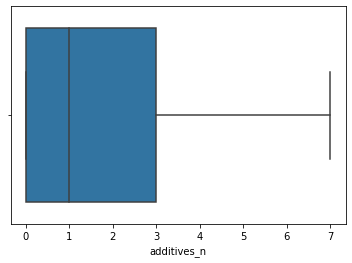

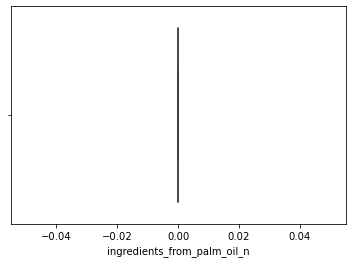

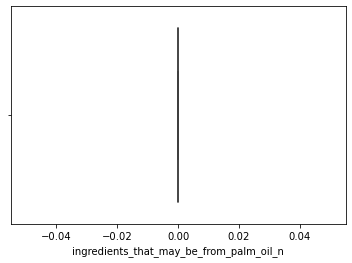

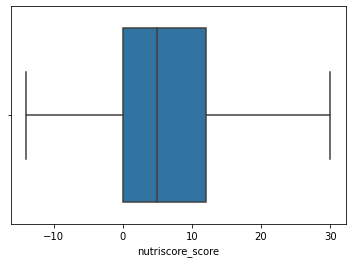

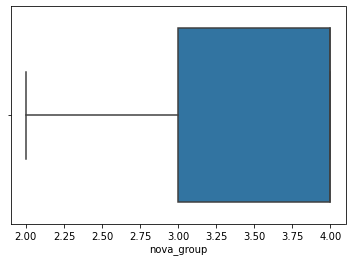

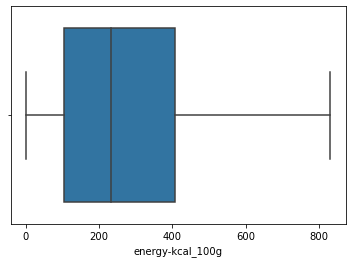

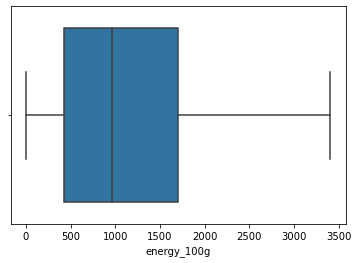

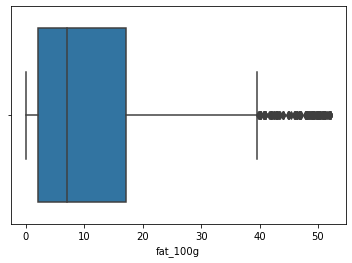

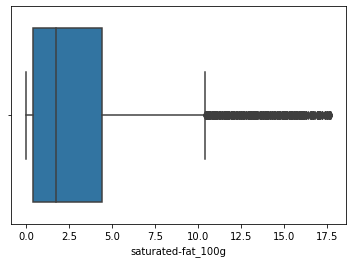

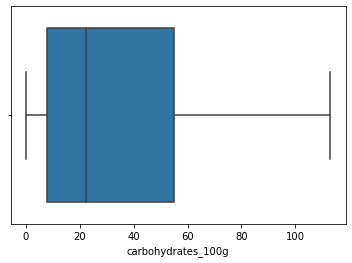

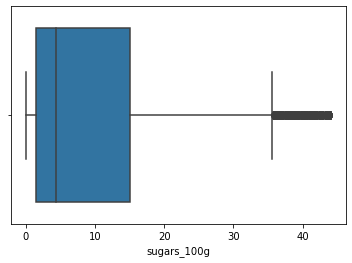

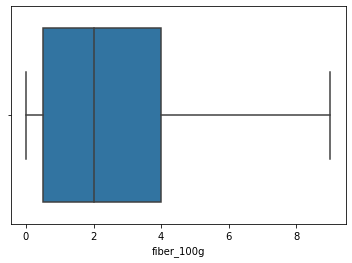

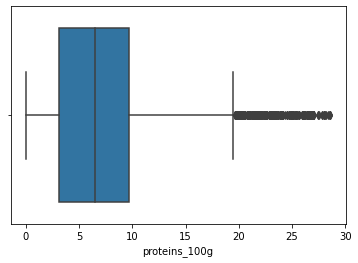

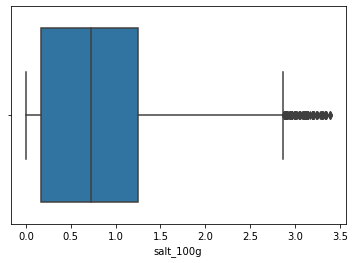

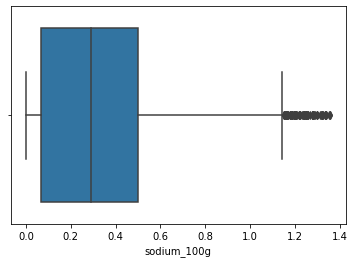

In [10]:
for var in df.columns:
    if df[var].dtypes == 'float64':
        sns.boxplot(x=var, data=df)
        plt.show()

### Analyses statistiques des variables

In [11]:
df.describe()

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,created_years,last_modified_years
count,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06,1.271353e+06
mean,6.801739e+01,1.379493e+00,5.899227e-03,2.550039e-02,6.423264e+00,3.825757e+00,2.157114e+02,9.017244e+02,8.566681e+00,2.659704e+00,2.228363e+01,6.920593e+00,1.637528e+00,7.177913e+00,7.284267e-01,2.913703e-01,2.019097e+03,2.020151e+03
std,3.093860e+01,1.836507e+00,7.772143e-02,1.861555e-01,4.901091e+00,6.053109e-01,1.408361e+02,5.953822e+02,9.778899e+00,3.667183e+00,2.239027e+01,9.541773e+00,1.089797e+00,5.989195e+00,6.664077e-01,2.665637e-01,1.439252e+00,6.961083e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.500000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,2.015000e+03,2.019000e+03
25%,6.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,4.000000e+00,1.160000e+02,4.680000e+02,1.800000e+00,4.000000e-01,6.700000e+00,1.360000e+00,1.500000e+00,3.210000e+00,1.900000e-01,7.600000e-02,2.018000e+03,2.020000e+03
50%,6.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,4.000000e+00,1.960000e+02,8.160000e+02,5.300000e+00,1.300000e+00,1.400000e+01,3.300000e+00,1.500000e+00,6.000000e+00,6.000000e-01,2.400000e-01,2.019000e+03,2.020000e+03
75%,6.400000e+01,1.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,4.000000e+00,2.860000e+02,1.213000e+03,1.100000e+01,2.910000e+00,3.000000e+01,7.000000e+00,1.500000e+00,9.000000e+00,9.925000e-01,3.970000e-01,2.020000e+03,2.021000e+03
max,2.400000e+02,4.900000e+01,2.000000e+00,6.000000e+00,3.600000e+01,4.000000e+00,8.480000e+02,3.548000e+03,5.233333e+01,1.770000e+01,1.240000e+02,4.410000e+01,9.000000e+00,2.880000e+01,3.392857e+00,1.357143e+00,2.021000e+03,2.021000e+03


# Analyses bivariées des variables